In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [10]:
data_train = pd.read_csv('train.tsv', delimiter = '\t')

In [11]:
data_train.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_174,feature_175,feature_176,feature_177,feature_178,feature_179,feature_180,feature_181,id,click
0,1.0000,1.0,0.0640,0.0,0.0,1.0,0.0,1.0,1.0,0.5,...,19.2,0.9152,27.0,0.9485,0.8162,0.9363,0.8387,0.9442,-5580542043594113876,0
1,0.6087,1.0,0.0767,0.0,0.0,1.0,0.0,1.0,1.0,0.5,...,19.2,0.9780,29.7,0.9821,0.9997,0.9979,0.9964,0.9749,-5147657754650748019,0
2,0.7391,1.0,0.0216,0.0,0.0,1.0,0.0,1.0,1.0,0.5,...,19.2,0.9927,29.7,0.9664,1.0000,0.9998,0.9981,0.9594,-5182265934499055022,1
3,1.0000,1.0,0.0067,0.0,0.0,1.0,0.0,1.0,1.0,0.5,...,19.2,0.9713,29.7,0.9631,0.8578,0.9994,0.7391,0.9827,-2693446194513214521,0
4,1.0000,1.0,0.0105,0.0,0.0,1.0,0.0,1.0,1.0,0.5,...,19.2,0.9401,27.0,0.9523,0.8058,0.9372,0.7438,0.9572,-1256457483511172004,0


In [12]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225400 entries, 0 to 225399
Columns: 184 entries, feature_0 to click
dtypes: float64(182), int64(2)
memory usage: 316.4 MB


In [13]:
data_train.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_174,feature_175,feature_176,feature_177,feature_178,feature_179,feature_180,feature_181,id,click
count,225400.000000,225400.000000,225400.000000,225400.000000,225400.000000,225400.000000,225400.000000,225400.000000,225400.000000,225400.000000,...,225400.000000,225400.000000,225400.000000,225400.000000,225400.000000,225400.000000,225400.000000,225400.000000,2.254000e+05,225400.000000
mean,0.841765,0.943079,0.038764,0.031204,0.050572,0.999965,0.132134,0.996776,0.999117,0.498825,...,19.289899,0.958194,28.774921,0.962064,0.965243,0.979049,0.942760,0.954560,-3.516986e+16,0.143407
std,0.134244,0.231692,0.036917,0.137635,0.219123,0.005957,0.338637,0.048502,0.029700,0.026948,...,0.464216,0.030600,1.597946,0.023909,0.054770,0.021171,0.063089,0.051837,4.847382e+18,0.350488
min,0.608700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,12.000000,0.645900,13.500000,0.397300,0.424800,0.475100,0.487600,0.460700,-9.223351e+18,0.000000
25%,0.739100,1.000000,0.010700,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.500000,...,19.200000,0.944500,27.000000,0.951100,0.967600,0.967100,0.922900,0.955700,-3.708015e+18,0.000000
50%,0.869600,1.000000,0.026300,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.500000,...,19.200000,0.966100,29.700000,0.964400,0.985800,0.984500,0.965200,0.966200,3.228712e+08,0.000000
75%,1.000000,1.000000,0.056800,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.500000,...,19.200000,0.978300,29.700000,0.975500,0.997600,0.997800,0.983500,0.977000,3.584230e+18,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,20.000000,1.000000,29.700000,1.000000,1.000000,1.000000,1.000000,1.000000,9.223335e+18,1.000000


In [14]:
#find columns with zero values
num_missing = data_train.isnull().sum()
percentage = num_missing / data_train.isnull().count()
missing_values_table = pd.concat([num_missing, percentage], axis = 1, keys = ['sum', 'percentage'])
missing_values_table[missing_values_table['sum']>0].sort_values('sum')

,sum,percentage


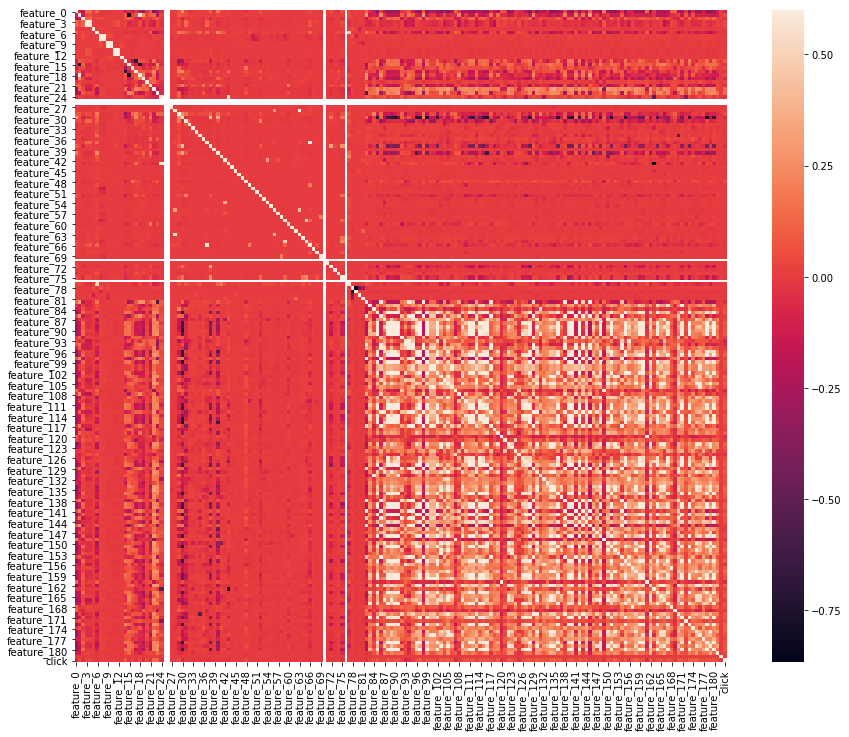

In [15]:
#correlation matrix
matrix = data_train.corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(matrix, vmax=0.6, square=True)

In [16]:
interesting_variables = matrix['click'].sort_values(ascending=False)
# Filter out the target variables (SalePrice) and variables with a low correlation score (v such that -0.6 <= v <= 0.6)
interesting_variables = interesting_variables[abs(interesting_variables) >= 0.1]
interesting_variables = interesting_variables[interesting_variables.index != 'SalePrice']
interesting_variables

click          1.000000
feature_22     0.137708
feature_23     0.132254
feature_158    0.124636
feature_135    0.116730
feature_152    0.110047
feature_162    0.104376
feature_122    0.102822
feature_175    0.102785
feature_173    0.101141
feature_97     0.100291
Name: click, dtype: float64

In [17]:
X = data_train.iloc[:, :-2]
y = data_train.loc[:, data_train.columns == 'click']

In [18]:
X_new = SelectKBest(chi2).fit_transform(X, y)

In [19]:
selector = SelectKBest(chi2)
X_n = selector.fit_transform(X, y)

In [20]:
X.columns[selector.get_support(indices=True)]

Index(['feature_3', 'feature_4', 'feature_19', 'feature_22', 'feature_23',
       'feature_24', 'feature_29', 'feature_30', 'feature_38', 'feature_48'],
      dtype='object')

In [21]:
X.columns[selector.get_support(indices=True)]

Index(['feature_3', 'feature_4', 'feature_19', 'feature_22', 'feature_23',
       'feature_24', 'feature_29', 'feature_30', 'feature_38', 'feature_48'],
      dtype='object')

In [22]:
X.columns[selector.get_support(indices=True)].tolist()

['feature_3',
 'feature_4',
 'feature_19',
 'feature_22',
 'feature_23',
 'feature_24',
 'feature_29',
 'feature_30',
 'feature_38',
 'feature_48']

In [23]:
data_dev = pd.read_csv('dev.tsv', delimiter = '\t')

In [24]:
X_dev = data_train.iloc[:, :-2]
y_dev = data_train.loc[:, data_train.columns == 'click']

In [25]:
#scaling the data for using PCA
scaler = StandardScaler()

In [26]:
scaler.fit(X_dev)
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [27]:
from sklearn.decomposition import PCA

In [28]:
pca = PCA(n_components=0.95)

In [29]:
pca.fit(X)
X = pca.transform(X)
X_dev = pca.transform(X_dev)

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
logreg = LogisticRegression(C=3.0)

In [32]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

/home/olha/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.
         Current function value: 0.676435
         Iterations 4
                          Results: Logit
Model:              Logit            No. Iterations:   4.0000     
Dependent Variable: click            Pseudo R-squared: -0.645     
Date:               2018-11-14 22:21 AIC:              304968.9478
No. Observations:   225400           BIC:              305134.1579
Df Model:           15               Log-Likelihood:   -1.5247e+05
Df Residuals:       225384           LL-Null:          -92662.    
Converged:          1.0000           Scale:            1.0000     
--------------------------------------------------------------------
           Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
x1        -0.0520     0.0027   -19.5748   0.0000   -0.0573   -0.0468
x2        -0.0450     0.0079    -5.7254   0.0000   -0.0605   -0.0296
x3        -0.2084     0.0082   -25.4121   0

In [33]:
logreg.fit(X, y)

/home/olha/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=3.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
logreg.score(X, y)

0.85334960070984911

In [35]:
logreg.score(X_dev, y_dev)

0.85334960070984911

In [36]:
preds = logreg.predict(X_dev)

In [37]:
preds

array([0, 0, 1, ..., 0, 0, 0])

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_dev, preds))

             precision    recall  f1-score   support

          0       0.86      0.99      0.92    193076
          1       0.34      0.02      0.04     32324

avg / total       0.78      0.85      0.79    225400

